# Lab 3 Solution: EDA on Netflix Titles

This notebook applies Exploratory Data Analysis (EDA) to `netflix_titles.csv` using the same workflow shown in the lab.

In [10]:
# Import libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for cleaner plots
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
# Load dataset
DATA_PATH = Path('/Users/zunecs/Documents/VS_Code/GitHub/ML---Labs/Lab3/data/netflix_titles.csv')
df = pd.read_csv(DATA_PATH)

print('Dataset shape:', df.shape)
df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic Checks

In [12]:
# Shape, dtypes, missing values, duplicates
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print('\nData types:')
print(df.dtypes)
print('\nMissing values count:')
print(df.isna().sum().sort_values(ascending=False))
print('\nDuplicate rows:', df.duplicated().sum())

Rows: 8807
Columns: 12

Data types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values count:
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Duplicate rows: 0


## Preprocessing for EDA

In [13]:
# Convert date column and extract numeric duration
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration_num'] = pd.to_numeric(df['duration'].str.extract(r'(\d+)')[0], errors='coerce')

df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
count,8807,8807,8807,6173,7982,7976,8709,8807.000000,8803,8804,8807,8807,8804.000000
unique,8807,2,8807,4528,7692,748,NaN,NaN,17,220,514,8775,NaN
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN
freq,1,6131,1,19,19,2818,NaN,NaN,3207,1793,362,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2014.180198,NaN,NaN,NaN,NaN,69.846888
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-20 00:00:00,2013.000000,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12 00:00:00,2017.000000,NaN,NaN,NaN,NaN,88.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00,2019.000000,NaN,NaN,NaN,NaN,106.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,312.000000


## Univariate Analysis

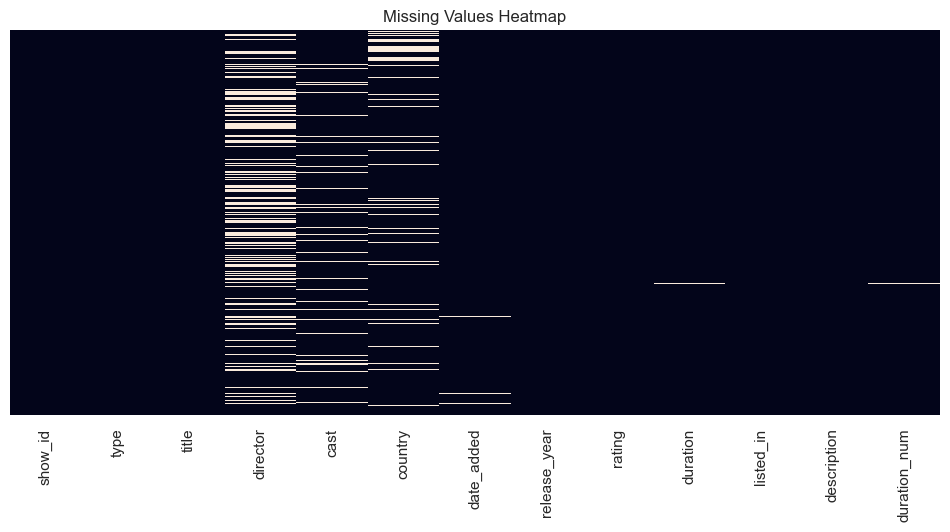

In [14]:
# Missing values heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

/var/folders/x4/q8lhv5ps1g56812s3r8phy9m0000gn/T/ipykernel_21253/2365168973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='type', palette='Set2')


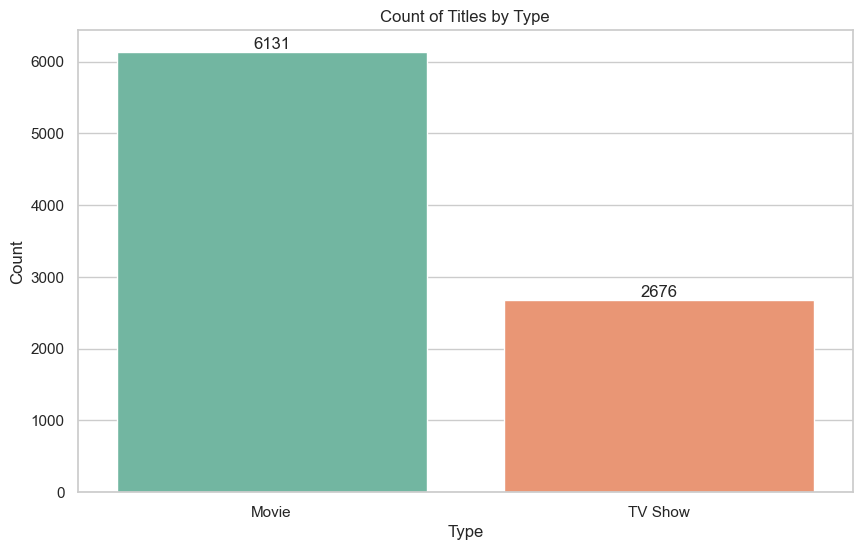

In [15]:
# Type distribution
ax = sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

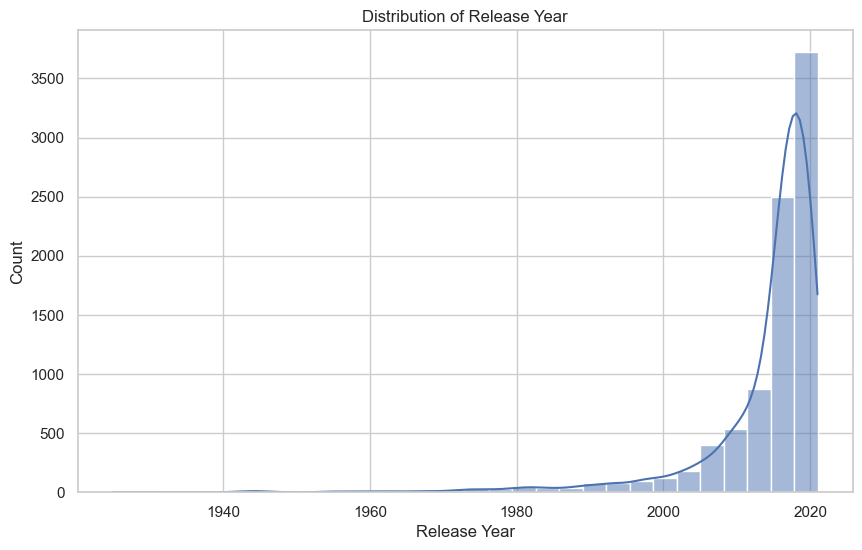

In [16]:
# Release year distribution
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

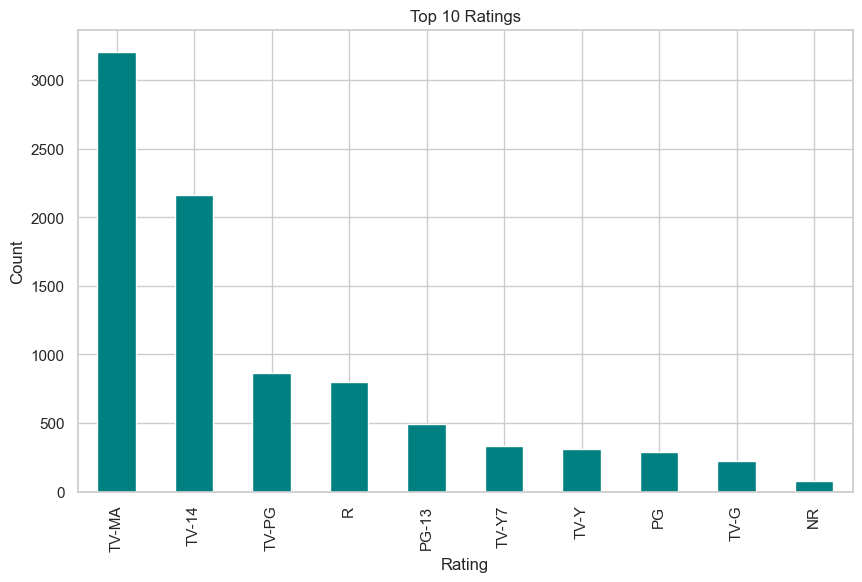

In [17]:
# Top ratings
df['rating'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

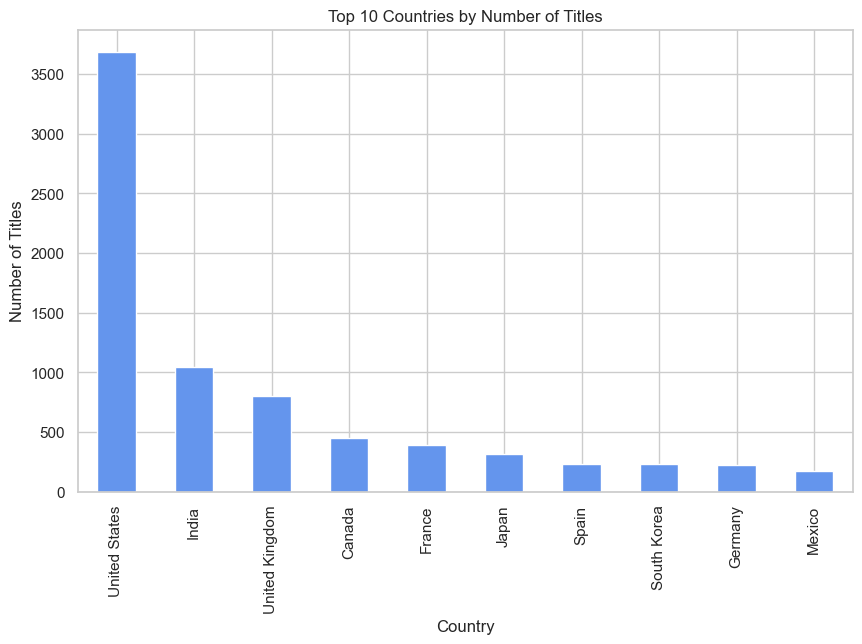

In [18]:
# Top 10 countries by titles
country_counts = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
country_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

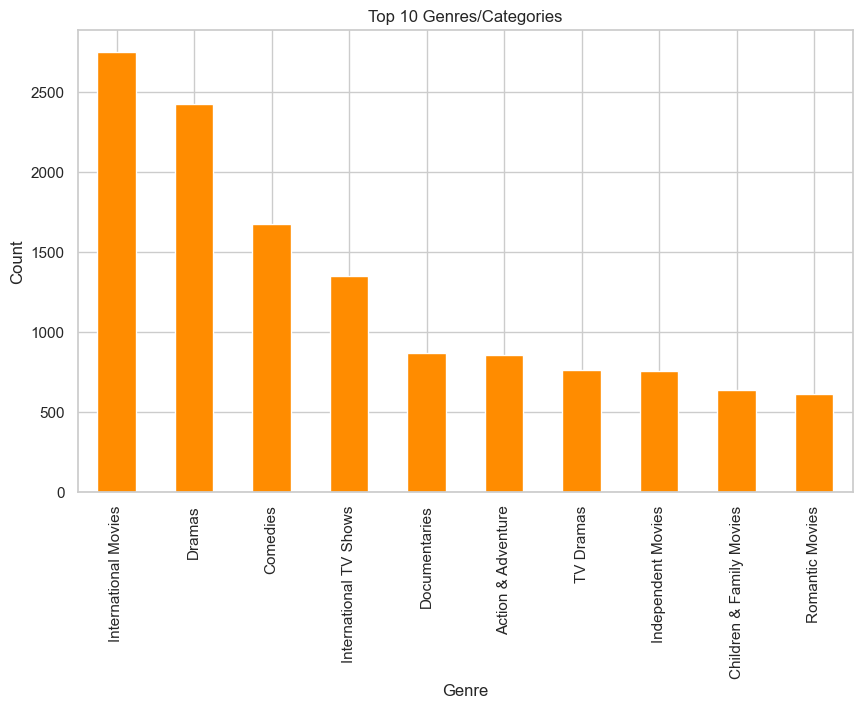

In [19]:
# Top 10 genres/categories
genre_counts = df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)
genre_counts.plot(kind='bar', color='darkorange')
plt.title('Top 10 Genres/Categories')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

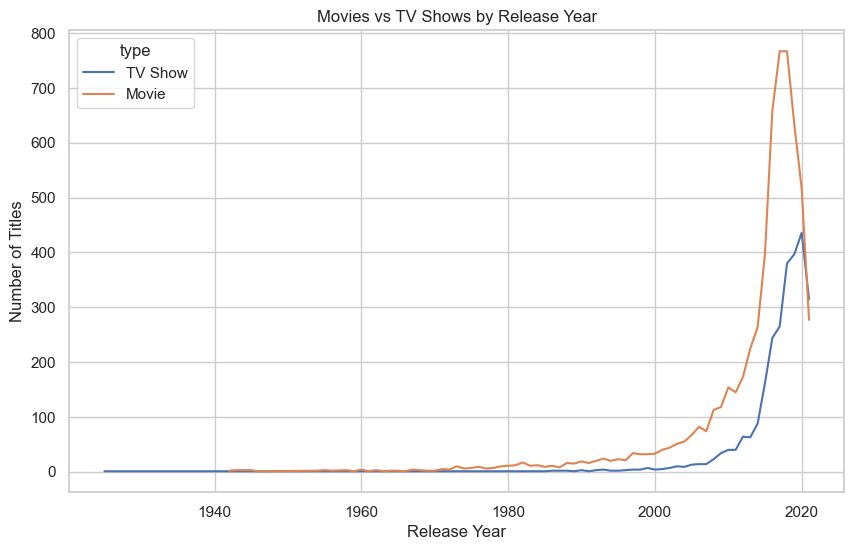

In [20]:
# Movies vs TV Shows by release year
content_by_year = df.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=content_by_year, x='release_year', y='count', hue='type')
plt.title('Movies vs TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

## Correlation Matrix

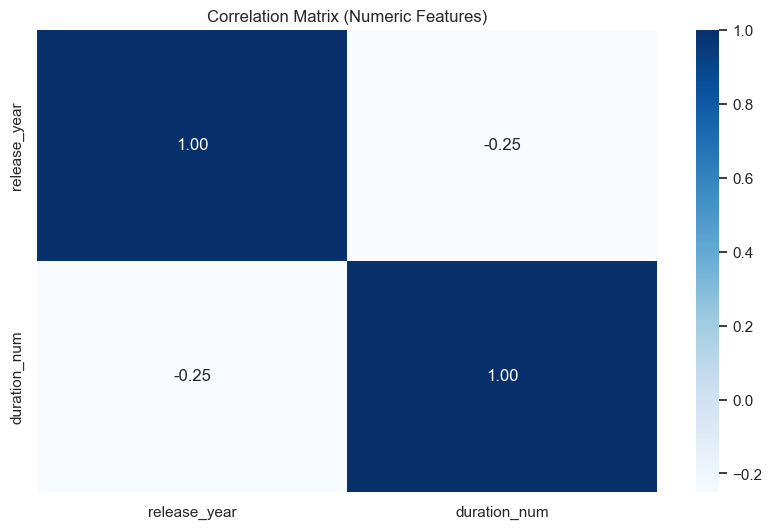

In [21]:
numeric_cols = ['release_year', 'duration_num']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

## Time-Based Analysis

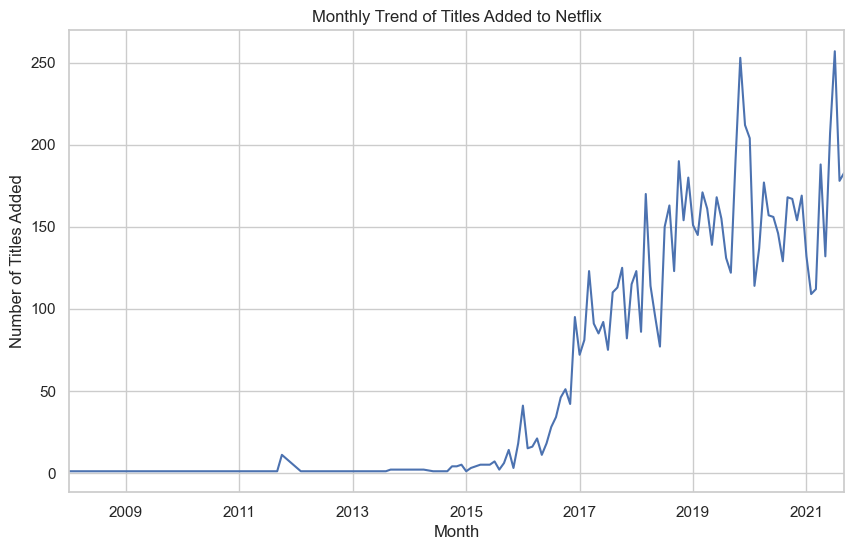

In [22]:
# Monthly titles added trend
df['month_added'] = df['date_added'].dt.to_period('M')
monthly_added = df.groupby('month_added').size().dropna()

monthly_added.plot()
plt.title('Monthly Trend of Titles Added to Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.show()

## Quick Summary

In [23]:
print(f"Total titles: {len(df)}")
print(f"Movies: {(df['type'] == 'Movie').sum()}")
print(f"TV Shows: {(df['type'] == 'TV Show').sum()}")
print(f"Unique countries: {df['country'].dropna().str.split(', ').explode().nunique()}")
print(f"Unique genres/categories: {df['listed_in'].dropna().str.split(', ').explode().nunique()}")

Total titles: 8807
Movies: 6131
TV Shows: 2676
Unique countries: 127
Unique genres/categories: 42
